## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Name : Mustafa GENÇ





------CAR------


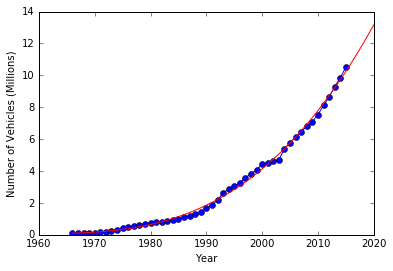

CAR Prediction 2016 : 10.791127
CAR Prediction 2017 : 11.356457
CAR Prediction 2018 : 11.941292
CAR Prediction 2019 : 12.545964
CAR Prediction 2020 : 13.170800




------MINIBUS------


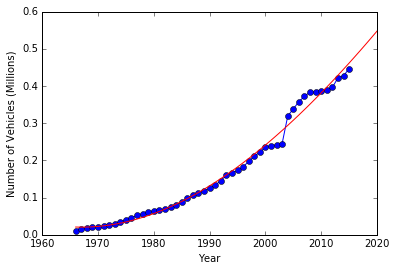

MINIBUS Prediction 2016 : 0.478346
MINIBUS Prediction 2017 : 0.495310
MINIBUS Prediction 2018 : 0.512499
MINIBUS Prediction 2019 : 0.529908
MINIBUS Prediction 2020 : 0.547534




------BUS------


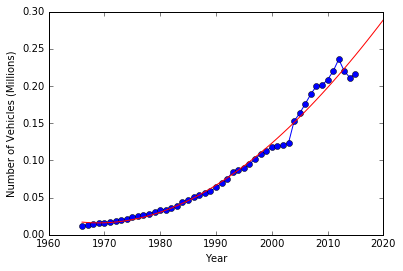

BUS Prediction 2016 : 0.250685
BUS Prediction 2017 : 0.260030
BUS Prediction 2018 : 0.269526
BUS Prediction 2019 : 0.279170
BUS Prediction 2020 : 0.288960




------SMALL_TRUCK------


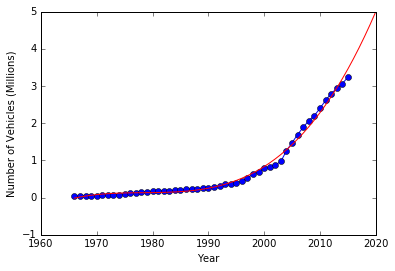

SMALL_TRUCK Prediction 2016 : 3.732354
SMALL_TRUCK Prediction 2017 : 4.024579
SMALL_TRUCK Prediction 2018 : 4.332282
SMALL_TRUCK Prediction 2019 : 4.655865
SMALL_TRUCK Prediction 2020 : 4.995727




------TRUCK------


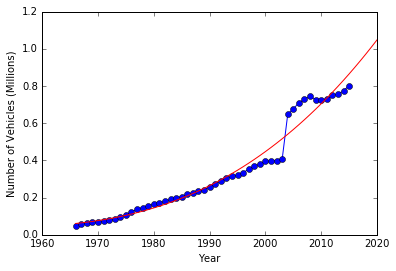

TRUCK Prediction 2016 : 0.899554
TRUCK Prediction 2017 : 0.935219
TRUCK Prediction 2018 : 0.971823
TRUCK Prediction 2019 : 1.009377
TRUCK Prediction 2020 : 1.047893




------MOTORCYCLE------


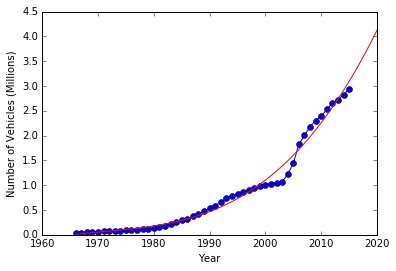

MOTORCYCLE Prediction 2016 : 3.281573
MOTORCYCLE Prediction 2017 : 3.479311
MOTORCYCLE Prediction 2018 : 3.685363
MOTORCYCLE Prediction 2019 : 3.899908
MOTORCYCLE Prediction 2020 : 4.123126




------SPECIAL_VEHICLES------


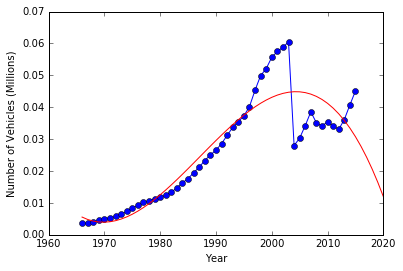

SPECIAL_VEHICLES Prediction 2016 : 0.027715
SPECIAL_VEHICLES Prediction 2017 : 0.024325
SPECIAL_VEHICLES Prediction 2018 : 0.020578
SPECIAL_VEHICLES Prediction 2019 : 0.016461
SPECIAL_VEHICLES Prediction 2020 : 0.011963




------MACHINERY------


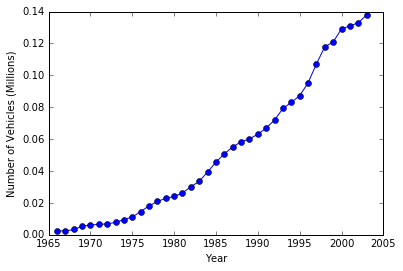

MACHINERY Prediction 2016 : nan
MACHINERY Prediction 2017 : nan
MACHINERY Prediction 2018 : nan
MACHINERY Prediction 2019 : nan
MACHINERY Prediction 2020 : nan




------TRACTOR------


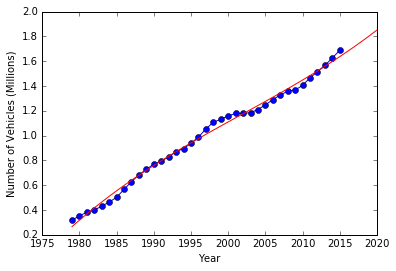

TRACTOR Prediction 2016 : 1.677421
TRACTOR Prediction 2017 : 1.719057
TRACTOR Prediction 2018 : 1.761890
TRACTOR Prediction 2019 : 1.805997
TRACTOR Prediction 2020 : 1.851455


In [77]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

K = 3
BaseYear = 1966
PredictionBaseYear = 2016
data_vehicle = pd.read_csv(u'data/vehicle.csv', sep=';')

# years to predict
x_predict = np.vstack([2016, 2017, 2018, 2019, 2020]) - BaseYear

def predict(vehicles, years, vehicle_type):
    A = np.hstack((np.power(years, i) for i in range(K + 1)))
    y_existing = np.matrix(vehicles).T/1000000.0
    w_star = (A.T * A).I * A.T * y_existing
    
    A_predict = np.hstack((np.power(x_predict, i) for i in range(K + 1)))
    y_predict = A_predict * w_star
    
    x_all = np.vstack([years, x_predict])
    y_all = np.vstack([A * w_star, y_predict])
    
    print "\n"
    print "\n"
    print "------" + vehicle_type + "------"
    plt.plot(years + BaseYear, y_existing, 'o-')
    plt.xlabel("Year")
    plt.ylabel("Number of Vehicles (Millions)")
    
    plt.plot(x_all + BaseYear, y_all, "r-")
    plt.show()

    for i in range(5): 
        print vehicle_type + " Prediction %d : %f" % (i + PredictionBaseYear, y_predict[i]) 
    return

# create x axis matrix
x = np.matrix(data_vehicle.Year).T - BaseYear

# plot existing data and predict upcoming years
predict(data_vehicle.Car, x, "CAR")
predict(data_vehicle.Minibus, x, "MINIBUS")
predict(data_vehicle.Bus, x, "BUS")
predict(data_vehicle.SmallTruck, x, "SMALL_TRUCK")
predict(data_vehicle.Truck, x, "TRUCK")
predict(data_vehicle.Motorcycle, x, "MOTORCYCLE")
predict(data_vehicle.SpecialVehicles, x, "SPECIAL_VEHICLES")
# no prediction actually, no data after 2004 for machinery
predict(data_vehicle.Machinery, x, "MACHINERY")
# use data after 13th index since tractor info exists after 1979
predict(data_vehicle.Tractor[13:], x[13:], "TRACTOR")